In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
import random


class AgentState(TypedDict):
    name: str
    number_list: list[int]
    counter: int

/Users/rifat/Documents/Coding/lang_graph_learning/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [12]:
def gretting_node(state: AgentState) -> AgentState:
    """A node that greets the user."""
    state["name"] = f"Hi {state['name']}!"
    state["counter"] = 0

    return state


def random_node(state: AgentState) -> AgentState:
    """A node that appends a random number to the number_list."""
    state["number_list"].append(random.randint(1, 100))
    state["counter"] += 1
    print(f"Loop count: {state['counter']}")

    return state


def should_continue(state: AgentState) -> bool:
    """A router node that decides whether to continue or stop."""
    return state["counter"] < 5

In [14]:
graph = StateGraph(AgentState)

graph.add_node("gretting_node", gretting_node)
graph.add_node("random_node", random_node)
graph.add_edge("gretting_node", "random_node")
graph.add_edge(START, "gretting_node")
graph.add_conditional_edges(
    source="random_node",
    path=should_continue,
    path_map={True: "random_node", False: END},
)
# graph.set_entry_point("gretting_node")
app = graph.compile()

app.invoke(
    {
        "name": "Rifat",
        "number_list": [],
        "counter": -20,
    }
)

Loop count: 1
Loop count: 2
Loop count: 3
Loop count: 4
Loop count: 5


{'name': 'Hi Rifat!', 'number_list': [80, 70, 7, 99, 63], 'counter': 5}

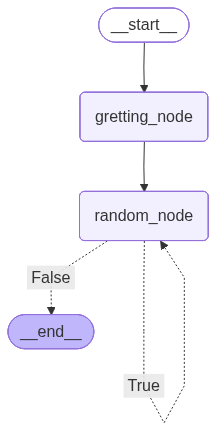

In [10]:
display(Image(app.get_graph().draw_mermaid_png()))